
**Hypothesis:**

**Family Size and Ticket Class:** Passengers traveling with larger families  tend to be in lower classes. This could examine whether larger families opted for more affordable travel options.

In [ ]:
pip install numpy pandas scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

df = pd.read_csv('Case Study Chapter 2 Topic 6_ Data Train.csv')

print(df.head())

print(df.isnull().sum())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Pa

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Combine SibSp and Parch
df['FamilySize'] = df['SibSp'] + df['Parch'] +1

# Encode categorical variables
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

# Handle missing values in Age
imputer = SimpleImputer(strategy='median')
df['Age'] = imputer.fit_transform(df[['Age']])


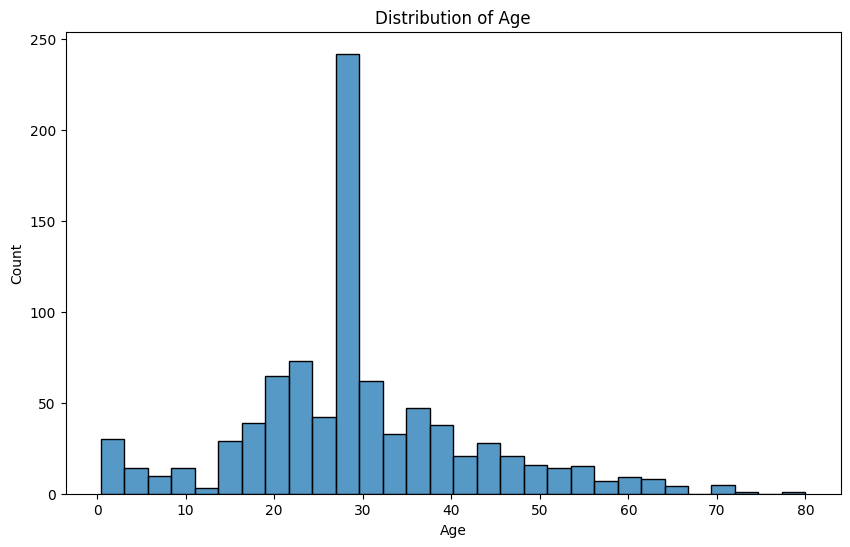

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30)
plt.title('Distribution of Age')
plt.show()

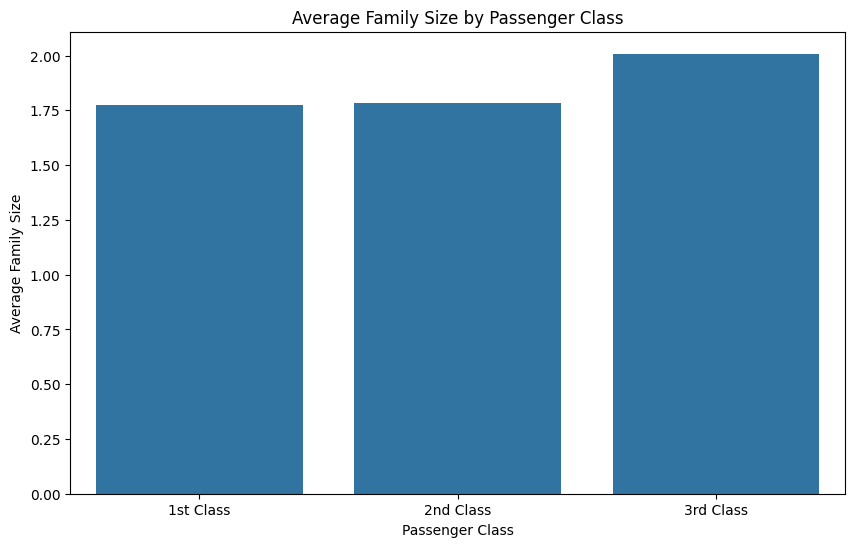

In [ ]:
mean_family_size = df.groupby('Pclass')['FamilySize'].mean().reset_index()

# Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='FamilySize', data=mean_family_size)
plt.title('Average Family Size by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Average Family Size')
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'])
plt.show()

In [ ]:
# Define features and target
X = df[['FamilySize', 'Age', 'Fare', 'Sex_male']]
y = df['Pclass']

# Split data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

In [ ]:
feature_importances = pd.DataFrame(random_forest.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

            importance
Fare          0.691038
Age           0.149832
FamilySize    0.142727
Sex_male      0.016403
Accuracy: 0.9497206703910615

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.94      0.97        53
           2       0.83      0.91      0.87        33
           3       0.97      0.97      0.97        93

    accuracy                           0.95       179
   macro avg       0.93      0.94      0.94       179
weighted avg       0.95      0.95      0.95       179

